In [33]:
setwd("/root/workspace/code/midas/eval/plot")
source("/root/workspace/code/midas/preprocess/utils.R")
library(tibble)
library(RColorBrewer)
library(dynutils)
library(stringr)
library(Hmisc)
library(plyr)
library(gdata)
library(scales)
library(reshape)


In [34]:
data <- "dogma"
# data <- "teadog"

mods <- "rna+atac"
# mods <- "rna+adt"


outdir <- "../../paper/3"
mkdir(outdir, remove_old = F)

all   <- as.data.frame(read.xls(paste0("data/scib_metric_", mods, "_", data, ".xlsx")))
names(all) <- c("Method", "Task", "Overall score")


In [35]:
if (mods == "rna+atac") {
    all[["Method"]] <- factor(x = all[["Method"]], levels = c("GLUE", "uniPort", "Cobolt", "MultiVI", "MIDAS"))
    all[["Task"]] <- factor(x = all[["Task"]], levels = paste0(data, c(
        "-paired",
        "-rna+paired",
        "-atac+paired",
        "-diagonal+paired",
        "-diagonal")))
} else {
    all[["Method"]] <- factor(x = all[["Method"]], levels = c("sciPENN", "totalVI", "MIDAS"))
    all[["Task"]] <- factor(x = all[["Task"]], levels = paste0(data, c(
        "-paired",
        "-rna+paired",
        "-adt+paired",
        "-diagonal+paired",
        "-diagonal")))
}


all

Method,Task,Overall score
<fct>,<fct>,<dbl>
MIDAS,dogma-paired,0.7840964
MIDAS,dogma-rna+paired,0.6734249
MIDAS,dogma-atac+paired,0.6875599
MIDAS,dogma-diagonal+paired,0.7065743
MIDAS,dogma-diagonal,0.5029574
GLUE,dogma-paired,NA
GLUE,dogma-rna+paired,NA
GLUE,dogma-atac+paired,NA
GLUE,dogma-diagonal+paired,NA


Warning message:
"Removed 9 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 9 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 9 rows containing missing values (`geom_bar()`)."


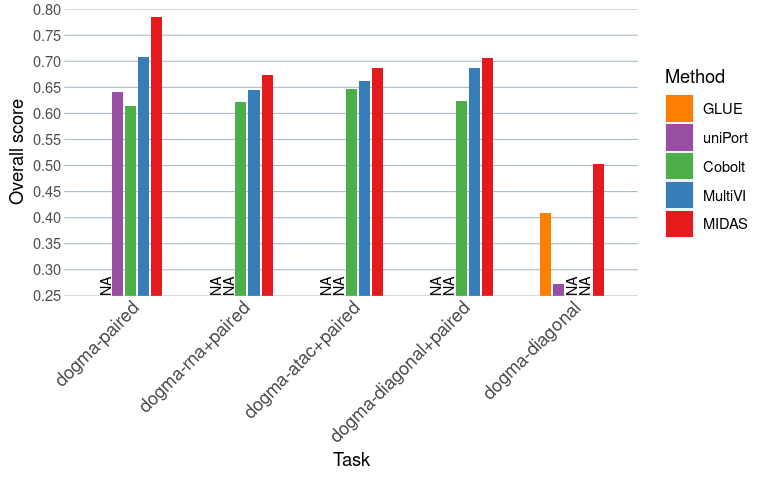

In [36]:
y_min <- floor(min(all[["Overall score"]], na.rm=TRUE) / 0.05) * 0.05
y_max <- ceil(max(all[["Overall score"]], na.rm=TRUE) / 0.05) * 0.05
p <- ggplot(data = all, aes(x = .data[["Task"]],
                                 y = .data[["Overall score"]],
                                 fill = .data[["Method"]], width = 0.5)) +
geom_bar(stat = "identity", position = position_dodge(width = 0.5 + 0.1)) +
scale_fill_brewer(palette = "Set1", direction = -1) +
  scale_y_continuous(
    limits = c(y_min, y_max),
    oob = rescale_none,
    breaks = seq(0, 1, by = 0.05),
    expand = c(0, 0), # The vertical axis does not extend to either side
    # position = "top"  # Labels are located on the top
  ) +
  # scale_y_discrete(expand = expansion(add = c(0, 0.5))) +
  theme(
    panel.background = element_rect(fill = "white"), # Set background color to white
    panel.grid.major.y = element_line(color = "#A8BAC4", size = 0.3), # Set the color and the width of the grid lines for the horizontal axis
    panel.grid.major.x = element_blank(),
    axis.ticks.length = unit(0, "mm"), # Remove tick marks by setting their length to 0
    # axis.title = element_blank(), # Remove the title for both axes
    # axis.line.y.left = element_line(color = "black"), # Only left line of the vertical axis is painted in black
    # axis.text.y = element_blank(),
    axis.text.x = element_text(size = 11)
    # axis.text.x = element_text(family = "Econ Sans Cnd", size = 16)
  ) +
  # rna + adt
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_text(
    data = subset(all, all[["Method"]] == "sciPENN" & is.na(all[["Overall score"]])),
    aes(y = y_min, label = "NA"),
    hjust = 0,
    nudge_x = -0.2,
    colour = "black",
    size = 3,
    angle = 90
  ) +
  geom_text(
    data = subset(all, all[["Method"]] == "totalVI" & is.na(all[["Overall score"]])),
    aes(y = y_min, label = "NA"),
    hjust = 0,
    nudge_x = 0.0,
    colour = "black",
    size = 3,
    angle = 90
  ) +
  # rna + atac
  geom_text(
    data = subset(all, all[["Method"]] == "GLUE" & is.na(all[["Overall score"]])),
    aes(y = y_min, label = "NA"),
    hjust = 0,
    nudge_x = -0.23,
    colour = "black",
    size = 3,
    angle = 90
  ) +
  geom_text(
    data = subset(all, all[["Method"]] == "uniPort" & is.na(all[["Overall score"]])),
    aes(y = y_min, label = "NA"),
    hjust = 0,
    nudge_x = -0.115,
    colour = "black",
    size = 3,
    angle = 90
  ) +
  geom_text(
    data = subset(all, all[["Method"]] == "Cobolt" & is.na(all[["Overall score"]])),
    aes(y = y_min, label = "NA"),
    hjust = 0,
    nudge_x = 0,
    colour = "black",
    size = 3,
    angle = 90
  ) +
  geom_text(
    data = subset(all, all[["Method"]] == "MultiVI" & is.na(all[["Overall score"]])),
    aes(y = y_min, label = "NA"),
    hjust = 0,
    nudge_x = 0.115,
    colour = "black",
    size = 3,
    angle = 90
  )

if (mods == "rna+atac") {
  w <- 6.4
} else {
  w <- 4.5
}
h <- 4
plt_size(w, h)
p
ggsave(plot = p, file = pj(outdir, paste0("3c_mosaic_scib_score_", mods, "_", data, ".png")), width = w, height = h, limitsize = F)
ggsave(plot = p, file = pj(outdir, paste0("3c_mosaic_scib_score_", mods, "_", data, ".pdf")), width = w, height = h, limitsize = F)